In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Twitch_game_data.csv',encoding= 'unicode_escape')
data.head()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03


In [70]:
import csv

Avg_viewers_list = []
Avg_viewers_count = 0

Peak_viewers_list = []
Peak_viewers_count = 0

Streamers_list = []
Streamers_count = 0

Years = []

# starting year
yr = 2016

with open('Twitch_game_data.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if yr == int(row['Year']):
            # otherwise track count
            Avg_viewers_count = Avg_viewers_count + int(row['Avg_viewers'])
            Peak_viewers_count = Peak_viewers_count  + int(row['Peak_viewers'])
            Streamers_count = Streamers_count + int(row['Streamers'])
            continue
        
        # if year changes, insert to list, clear count, and increment year
        if yr != int(row['Year']):
            Avg_viewers_list.append(Avg_viewers_count)
            Peak_viewers_list.append(Peak_viewers_count)
            Streamers_list.append(Streamers_count)
            
            Avg_viewers_count = 0
            Peak_viewers_count = 0
            Streamers_count = 0
            
            Years.append(yr)
            
            yr = yr + 1
    
    # if we read EOF, append the last datum
    Avg_viewers_list.append(Avg_viewers_count)
    Peak_viewers_list.append(Peak_viewers_count)
    Streamers_list.append(Streamers_count)
    Years.append(yr)
csvfile.close()
        
print(Avg_viewers_list)
print(Peak_viewers_list)
print(Streamers_list)

[6952072, 8157652, 11651676, 13591594, 23075628, 22980336]
[77947535, 86949453, 111386230, 115101162, 169234810, 165445612]
[18906613, 22108397, 37225232, 40099136, 58503303, 54547164]


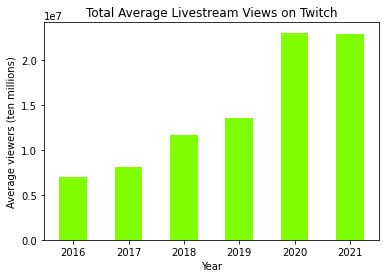

In [71]:
#Avg_viewers_dict = dict(zip(Years, Avg_viewers_list))
#print(Avg_viewers_dict)

plt.bar(Years, Avg_viewers_list, color='chartreuse', width=0.5)
plt.xlabel('Year')
plt.ylabel('Average viewers (ten millions)')
plt.title('Total Average Livestream Views on Twitch')
plt.show()

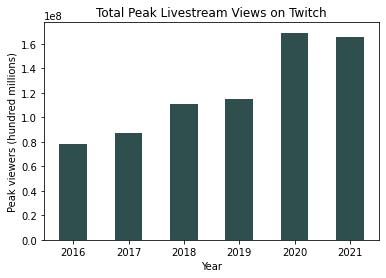

In [72]:
plt.bar(Years, Peak_viewers_list, color='darkslategrey', width=0.5)
plt.xlabel('Year')
plt.ylabel('Peak viewers (hundred millions)')
plt.title('Total Peak Livestream Views on Twitch')
plt.show()

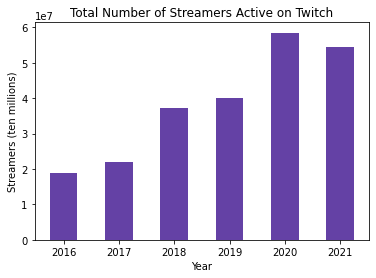

In [74]:
plt.bar(Years, Streamers_list, color='#6441a5', width=0.5)
plt.xlabel('Year')
plt.ylabel('Streamers (ten millions)')
plt.title('Total Number of Streamers Active on Twitch')
plt.show()